 ## House Price Prediction - Single Feature Version

Author : Xin Zhang

1.In this report, feature 'GrLivArea' is used as the single feature for Linear Regerssion. Because the correation of     'GrLivArea' to 'SalePrice' is highest among all features.  
2.The Target variable is analysed in section 2.  
3.The Missing value is also check in data pre-processing phase.  
4.The submission file is generated in the end and submitted to Kaggle.   
5.Finally, a high-level Linear Regression and RF and GBR model is used in "House-Price-Prediction". In this file, all   missing values are analysed and processed.

In [78]:
#Import libraries
import math
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline


In [2]:
#Load dataset
train = pd.read_csv('./data/train.csv')

In [67]:
test = pd.read_csv('./data/test.csv')

In [3]:
pd.options.display.max_columns = None
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#shape of train data
train.shape

(1460, 81)

In [5]:
#you can also check the data set information using the info() command. 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

### Target variable 
Some analysis on target variable

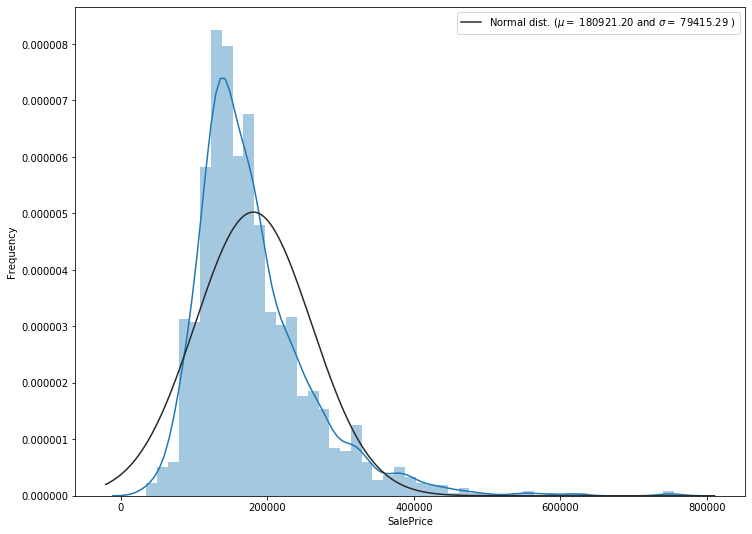

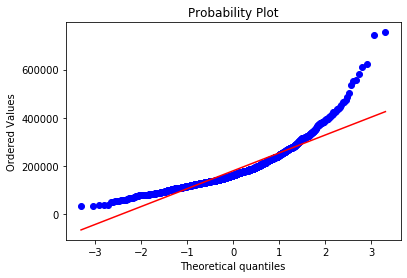

In [6]:
plt.subplots(figsize=(12,9))
sns.distplot(train['SalePrice'], fit=stats.norm)

# Get the fitted parameters used by the function

(mu, sigma) = stats.norm.fit(train['SalePrice'])

# plot with the distribution

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

#Probablity plot

fig = plt.figure()
stats.probplot(train['SalePrice'], plot=plt)
plt.show()

This target varibale is right skewed. Now, we need to tranform this variable and make it normal distribution.

For more information about that [click here](http://whatis.techtarget.com/definition/skewness)

#### Here we use log for target variable to make more normal distribution

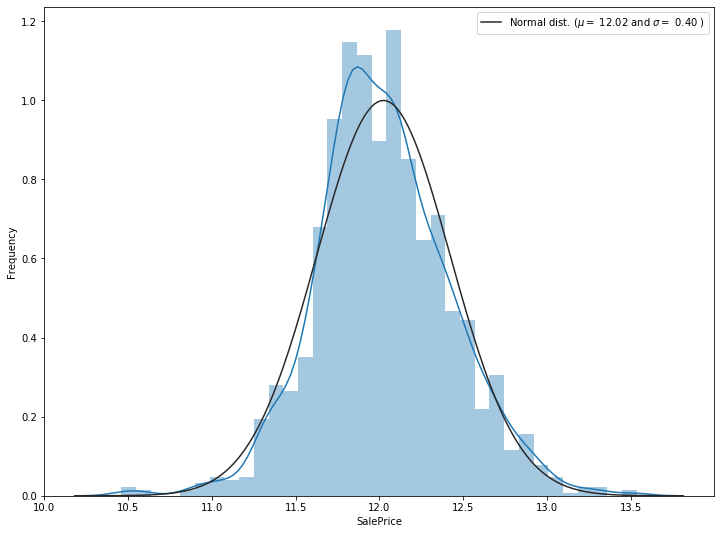

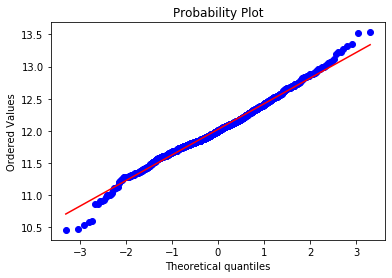

In [7]:
#we use log function which is in numpy
train['SalePrice'] = np.log1p(train['SalePrice'])

#Check again for more normal distribution

plt.subplots(figsize=(12,9))
sns.distplot(train['SalePrice'], fit=stats.norm)

# Get the fitted parameters used by the function

(mu, sigma) = stats.norm.fit(train['SalePrice'])

# plot with the distribution

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

#Probablity plot

fig = plt.figure()
stats.probplot(train['SalePrice'], plot=plt)
plt.show()

### Check the missing values

In [8]:
#Let's check if the data set has any missing values. 
train.columns[train.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

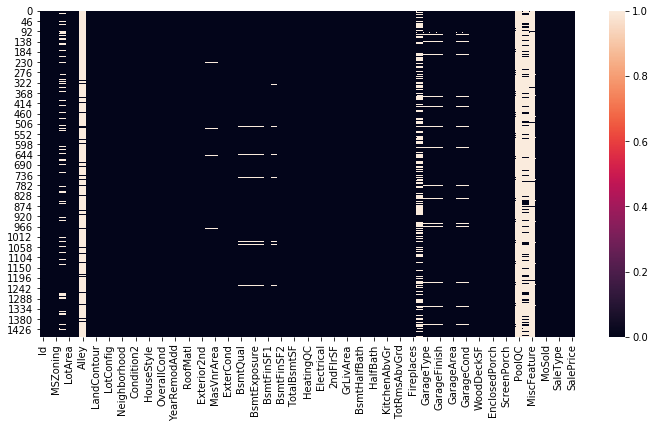

In [9]:
#plot of missing value attributes
plt.figure(figsize=(12, 6))
sns.heatmap(train.isnull())
plt.show()

In [10]:
#missing value counts in each of these columns
Isnull = train.isnull().sum()/len(train)*100
Isnull = Isnull[Isnull>0]
Isnull.sort_values(inplace=True, ascending=False)
Isnull

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

### Visualising missing values

In [11]:
#Convert into dataframe
Isnull = Isnull.to_frame()

In [12]:
Isnull.columns = ['count']

In [13]:
Isnull.index.names = ['Name']

In [14]:
Isnull['Name'] = Isnull.index

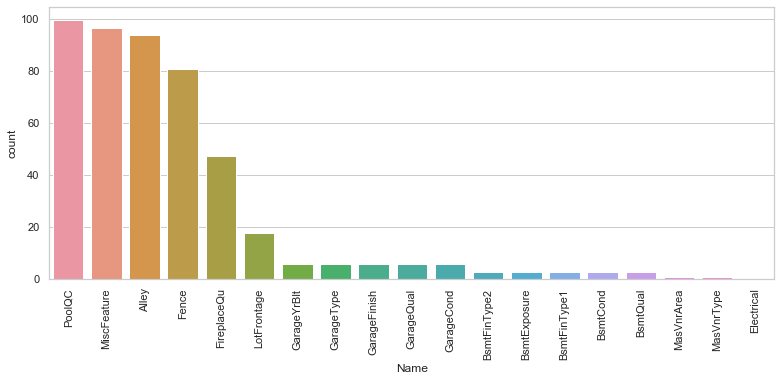

In [15]:
#plot Missing values
plt.figure(figsize=(13, 5))
sns.set(style='whitegrid')
sns.barplot(x='Name', y='count', data=Isnull)
plt.xticks(rotation = 90)
plt.show()

### Corralation between train attributes

In [16]:
#Separate variable into new dataframe from original dataframe which has only numerical values
#there is 38 numerical attribute from 81 attributes
train_corr = train.select_dtypes(include=[np.number])

In [17]:
train_corr.shape

(1460, 38)

In [18]:
#Delete Id because that is not need for corralation plot
del train_corr['Id']

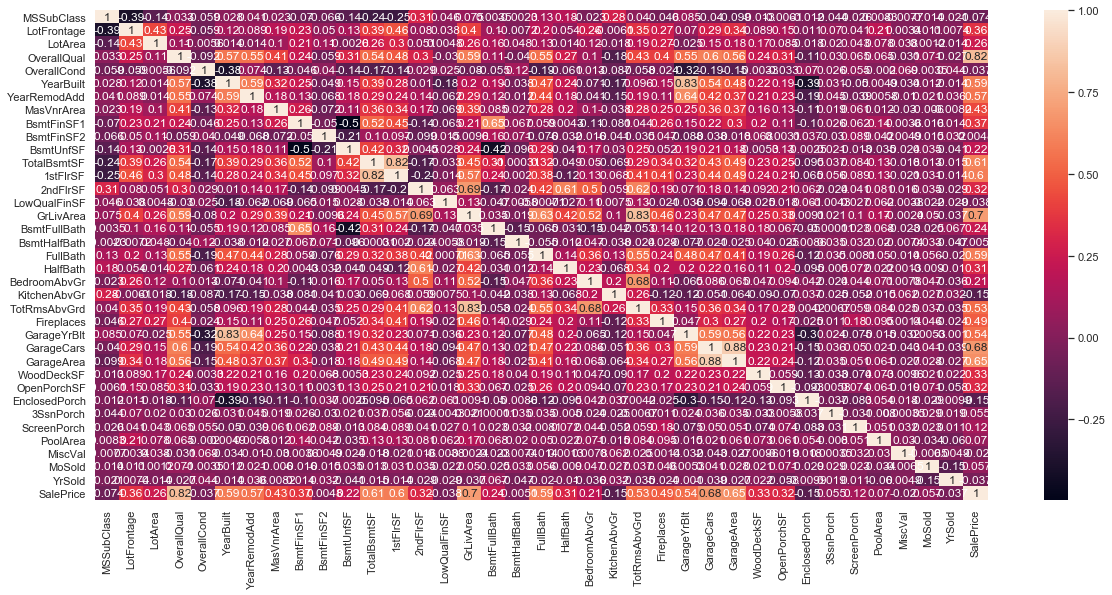

In [19]:
#Coralation plot
corr = train_corr.corr()
plt.subplots(figsize=(20,9))
sns.heatmap(corr, annot=True)

#### Top 50% Corralation  train attributes  with sale-price 

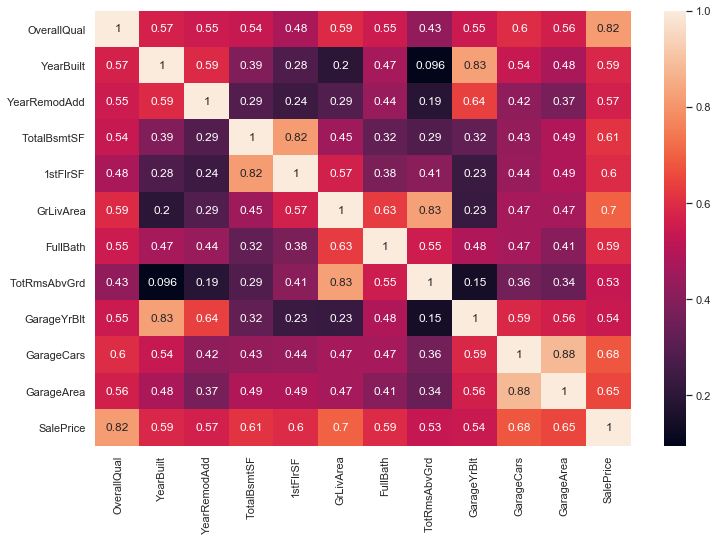

In [20]:
top_feature = corr.index[abs(corr['SalePrice']>0.5)]
plt.subplots(figsize=(12, 8))
top_corr = train[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

Here OverallQual is highly correlated with target feature of saleprice by 82%

In [21]:
#unique value of OverallQual
train.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2])

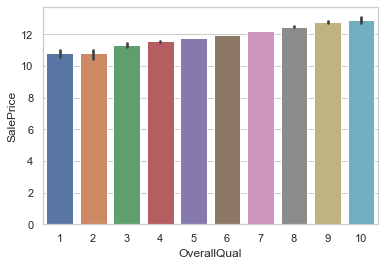

In [22]:
sns.barplot(train.OverallQual, train.SalePrice)

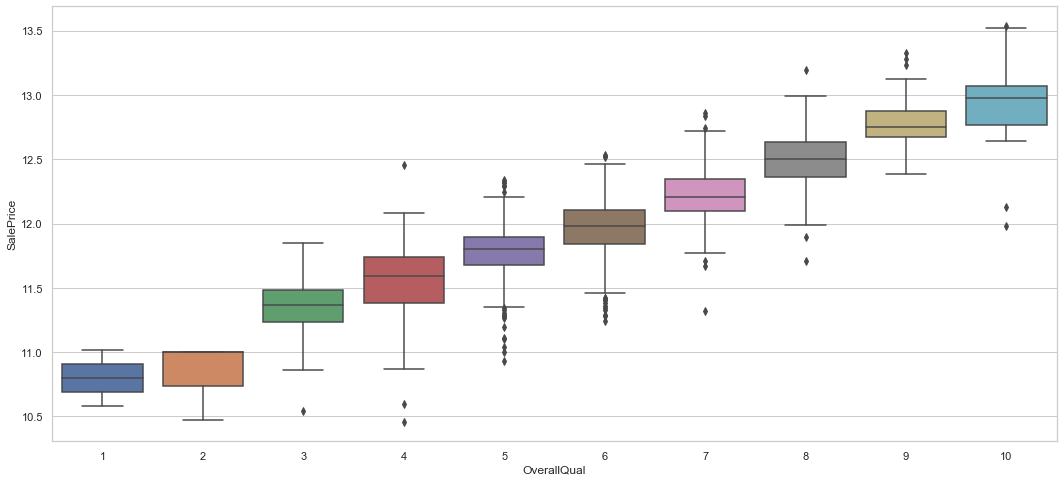

In [23]:
#boxplot
plt.figure(figsize=(18, 8))
sns.boxplot(x=train.OverallQual, y=train.SalePrice)

//anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


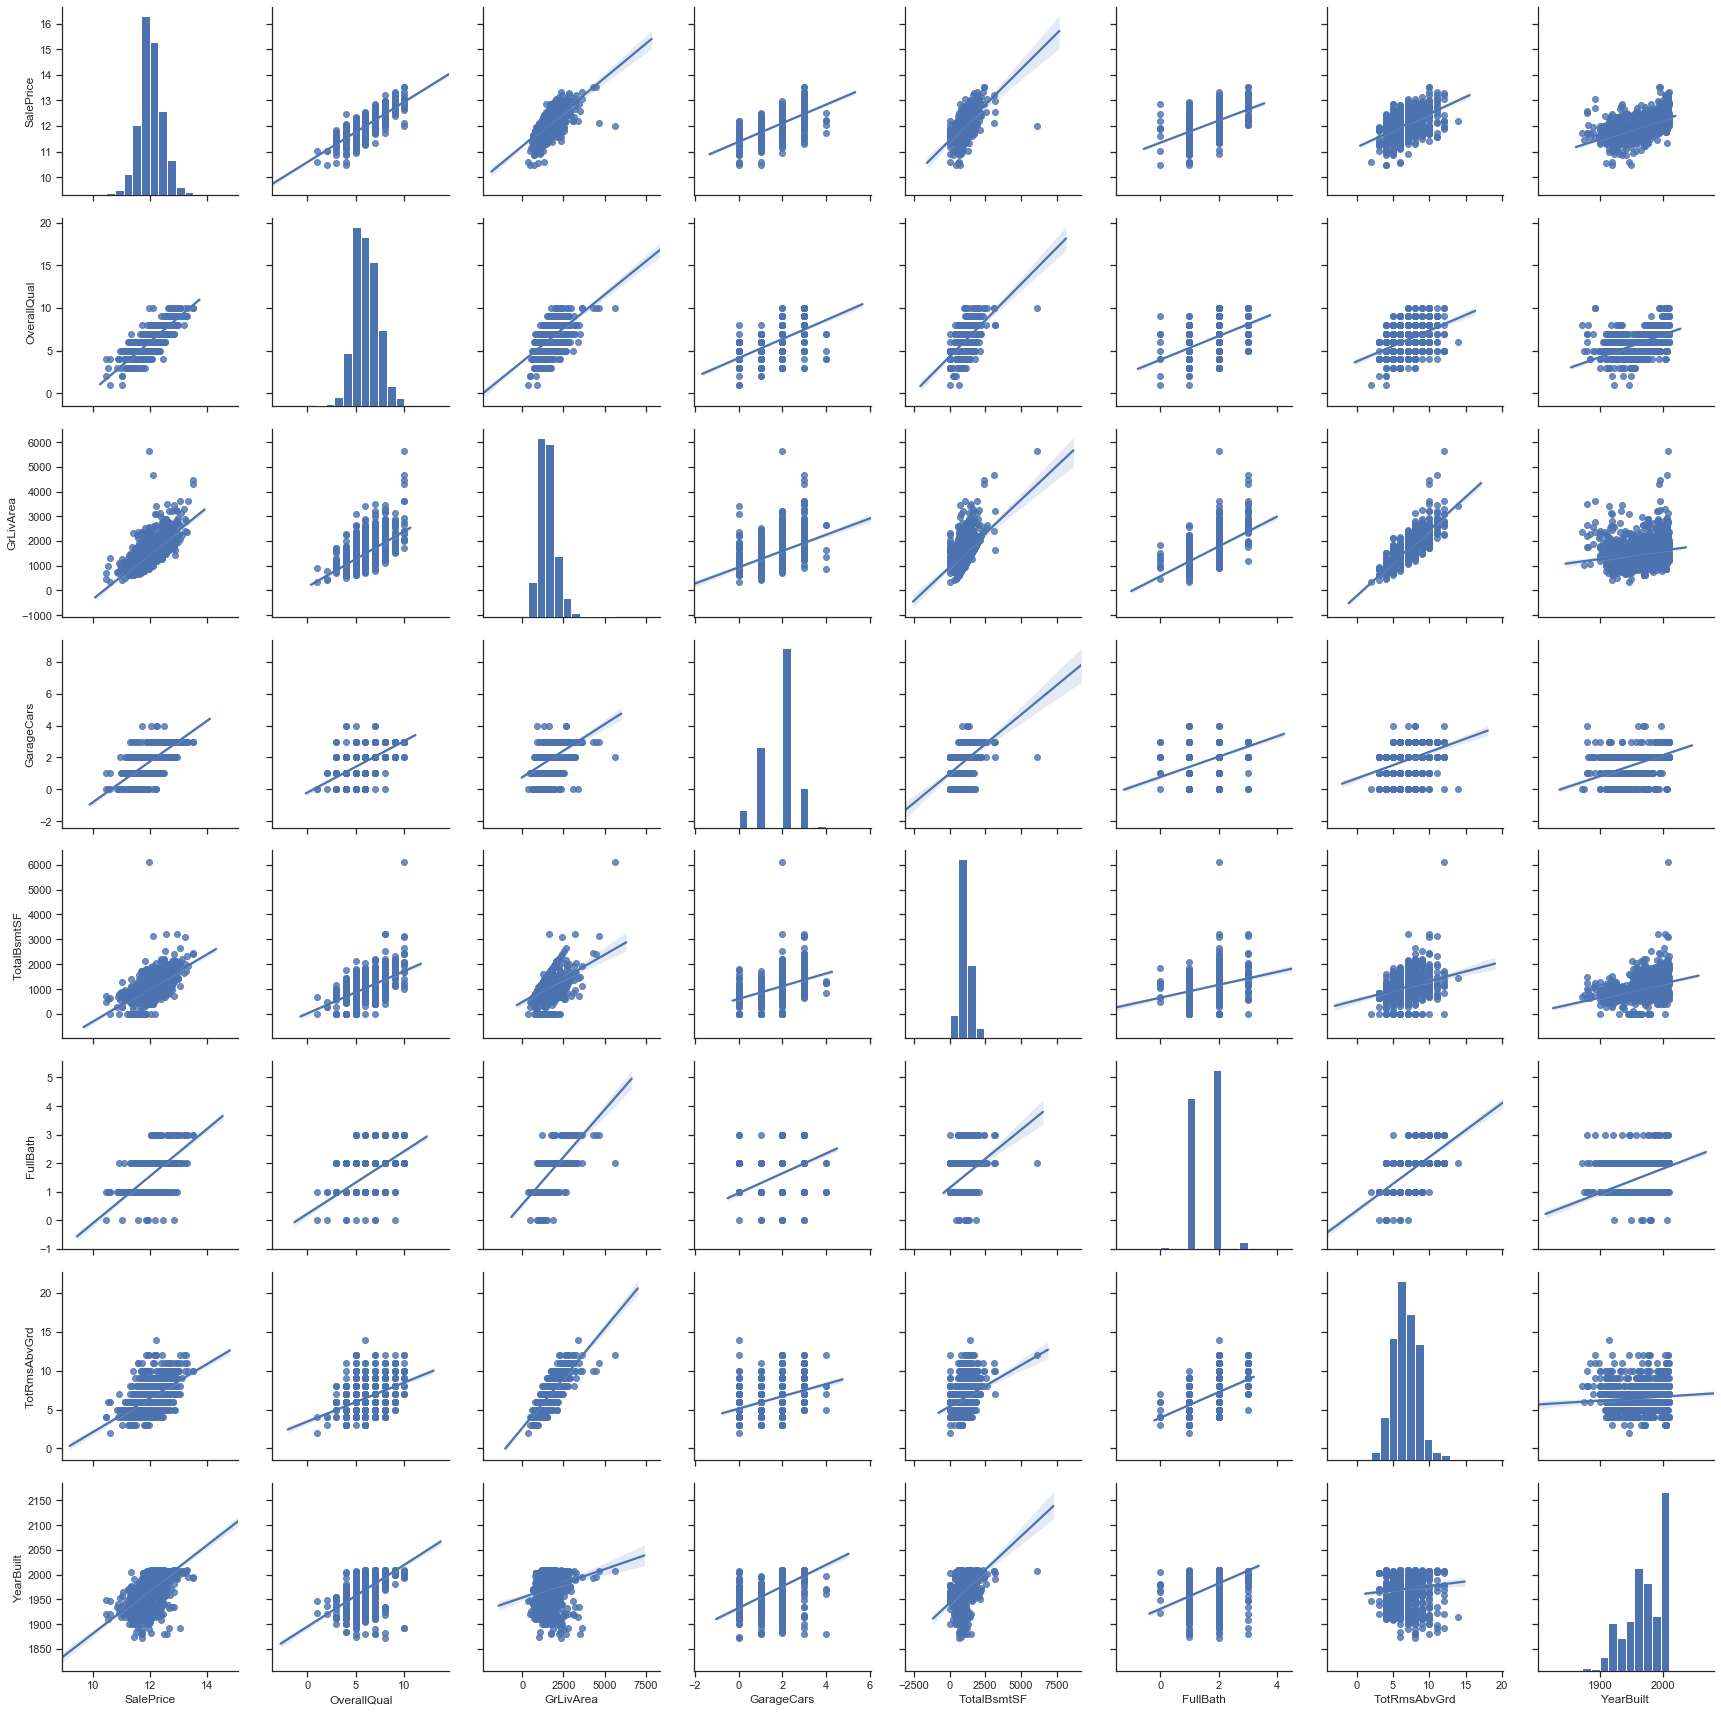

In [24]:
col = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']
sns.set(style='ticks')
sns.pairplot(train[col], size=3, kind='reg')

In [25]:
print("Find most important features relative to target")
corr = train.corr()
corr.sort_values(['SalePrice'], ascending=False, inplace=True)
corr.SalePrice

Find most important features relative to target


SalePrice        1.000000
OverallQual      0.817185
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
GarageYrBlt      0.541073
TotRmsAbvGrd     0.534422
Fireplaces       0.489450
MasVnrArea       0.430809
BsmtFinSF1       0.372023
LotFrontage      0.355879
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209043
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057330
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
Id              -0.017942
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
Name: SalePr

## There is no any missing values in GrLivArea and the correlation of GrLivArea to SalePrice is the Highest, so GrLivArea is used as the feature to do Linear Regression

#### Prepraring data for prediction

In [39]:
#Take targate variable into y
y = train['SalePrice']
x = train['GrLivArea']

In [40]:
#Take their values in X and y
X = x.values
y = y.values

In [41]:
# Split data into train and test formate
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

### Linear Regression

In [42]:
#Train the model
from sklearn import linear_model
model = linear_model.LinearRegression()

In [51]:
#Fit the model
model.fit(X_train.reshape(-1,1), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
#Score/Accuracy
print("Accuracy --> ", model.score(X_test.reshape(-1,1), y_test)*100)

Accuracy -->  52.031510871549315


In [68]:
#Let's check if the data set has any missing values. 
test.columns[test.isnull().any()]

Index(['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType'],
      dtype='object')

In [71]:
# There is no missing values in test data,
y_test = model.predict(test['GrLivArea'].values.reshape(-1,1))

In [87]:
df = pd.DataFrame()
df['Id'] = test['Id']
df['SalePrice'] = np.exp(y_test)-1

In [88]:
df.head()

,Id,SalePrice
0,1461,127020.855694
1,1462,138488.665584
2,1463,248978.793158
3,1464,195469.413906
4,1465,165823.581313


In [90]:
df.to_csv('submission.csv', index=False)